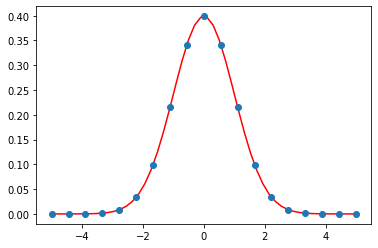

In [1]:
import scipy as sp
import numpy as np
from numpy import array
import matplotlib.pyplot as plt


def gfunc(x: float, mu: float, sigma: float):
    #just a gaussian function
    
    return (np.exp(((-(x - mu)**2)/ 2 * sigma**2))/(sigma * (2*np.pi)**(1/2)))


def gdist(x: array, mu: float, sigma: float):
    #gaussian distribution
    y = array([])
    for i in range(0,len(x)):
        y = np.append(y, gfunc(x[i], mu, sigma))

    return y


def lin_interpolation(y1: float, y2: float, x1: float, x2: float, x: float):
    #linear interpolation equation
    
    return (y1 + (y2 - y1)*(x - x1)/(x2 - x1))


def x_inter(x: array):
    #values of x for gaussian distribution + values of x for interpolated values
    _x = array([])
    for i in range(len(x)-1):
        _x = np.append(_x, x[i])
        _x = np.append(_x, np.mean([x[i],x[i+1]]))
    _x = np.append(_x, x[-1])
    
    return _x

def gdist_inter(x: array, y: array):
    #gaussian distribution + interpolated values
    _y = array([])
    for i in range(len(y)-1):
        _y = np.append(_y, y[i])
        _y = np.append(_y, lin_interpolation(y[i], y[i+1], x[i], x[i+1], np.mean([x[i],x[i+1]])))
    _y = np.append(_y, y[-1])
    
    return _y
    
    
mu = 0
sigma = 1
x = np.linspace(-5,5,num = 50)
y = gdist(x,mu,sigma)

#plotting gaussian function
plt.plot(x, y, c = 'r')


_x = np.linspace(-5,5,num=19)
_y = gdist(_x,mu,sigma)

#plotting points before linear interpolation
plt.plot(_x, _y, 'o')


In [35]:
#Checking arrays created
gdist_var = gdist(_x, mu, sigma)
all_x = x_inter(_x)
print(len(all_x))

37


In [36]:
all_y = gdist_inter(all_x, gdist_var)
print(len(all_y))

37


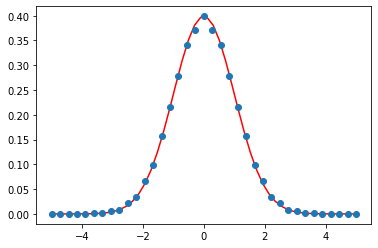

In [38]:
#plotting point after interpolation
plt.plot(x, y, c = 'r')
plt.plot(all_x, all_y, 'o')
